# Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

## Домашнее задание

In [1]:
import numpy as np
import matplotlib.pyplot as plt

__Задача:__ предсказание баллов ЕГЭ ученика

In [2]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [4]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min())

def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [5]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm[:, 1] = min_max_scale(X_norm[:, 1])
X_norm[:, 2] = min_max_scale(X_norm[:, 2])
X_norm[:, 3] = min_max_scale(X_norm[:, 3])
X_norm

array([[1.        , 0.1       , 0.03225806, 0.        ],
       [1.        , 0.1       , 0.16129032, 0.        ],
       [1.        , 0.2       , 0.19354839, 0.5       ],
       [1.        , 0.5       , 0.09677419, 0.        ],
       [1.        , 0.3       , 0.64516129, 0.5       ],
       [1.        , 0.        , 0.22580645, 0.        ],
       [1.        , 0.5       , 0.67741935, 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 0.1       , 0.        , 0.        ],
       [1.        , 0.2       , 0.35483871, 0.5       ]])

In [6]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8, log=True, show_mse=True):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if log == True and i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    if show_mse==True:
          print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

## Домашнее задание <a class='anchor' id='hw'>

__1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод__

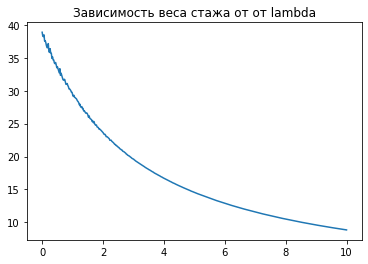

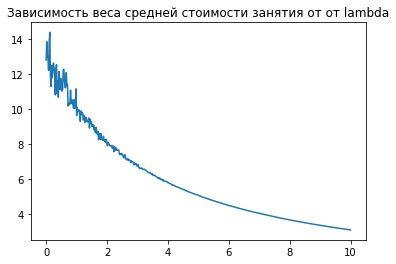

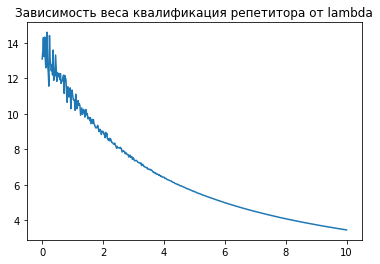

In [7]:
lambda_space = np.linspace(1e-10, 10, 500)
v_y = np.zeros(len(lambda_space))
v_x1 = np.zeros(len(lambda_space))
v_x2 = np.zeros(len(lambda_space))
v_x3 = np.zeros(len(lambda_space))

for n in range(0,len(lambda_space)):
    v_y[n] = lambda_space[n]
    v_x1[n] = gradient_descent_reg_l2(X_norm, y, iterations=1000, eta=1e-3, reg=lambda_space[n], log=False, show_mse=False)[0]
    v_x2[n] = gradient_descent_reg_l2(X_norm, y, iterations=1000, eta=1e-3, reg=lambda_space[n], log=False, show_mse=False)[1]
    v_x3[n] = gradient_descent_reg_l2(X_norm, y, iterations=1000, eta=1e-3, reg=lambda_space[n], log=False, show_mse=False)[2]    

plt.title('Зависимость веса стажа от от lambda')
plt.plot(v_y, v_x1)
plt.show()


plt.title('Зависимость веса средней стоимости занятия от от lambda')    
plt.plot(v_y, v_x2)
plt.show()

plt.title('Зависимость веса квалификация репетитора от lambda')    
plt.plot(v_y, v_x3)
plt.show()

При росте коэффициента регуляризации lambda значения весов начинают уменьшаться, так как он штрафует за большие величины.

__2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.__

In [15]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W / abs(W) # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [16]:
gradient_descent_reg_l1(X_norm, y, iterations=10000, eta=1e-2, reg=1e-4)

Iter: 0, weights: [ 2.04305795  1.13518111  1.17773784 -0.19576228], error 3217.2766522758925
Iter: 1000, weights: [44.06478828 15.49782002 10.40135316 12.14121464], error 27.423124036583847
Iter: 2000, weights: [44.1177658  17.55782391  7.98716081 12.59833547], error 26.382379350144742
Iter: 3000, weights: [44.12638176 18.92344277  6.11768644 13.21040379], error 25.80440901480838
Iter: 4000, weights: [44.1459816  19.8366675   4.63474041 13.80575912], error 25.463444765918183
Iter: 5000, weights: [44.16932587 20.46477473  3.45656265 14.34068488], error 25.255361112665348
Iter: 6000, weights: [44.19231807 20.90874602  2.51976536 14.8012435 ], error 25.125968612171448
Iter: 7000, weights: [44.21312936 21.23043057  1.77447154 15.18768168], error 25.04470382900299
Iter: 8000, weights: [44.23112464 21.46854311  1.18129242 15.50662896], error 24.993401162909393
Iter: 9000, weights: [44.24626438 21.64793508  0.70904442 15.76701741], error 24.960927663718653
Final MSE: 24.94034483341175


array([44.25877052, 21.7848852 ,  0.3333305 , 15.97784526])

__3. *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?__

Нельзя, так как нормализация предполагает замену номинальных признаков так, чтобы каждый из них лежал в диапазоне от 0 до 1. А стандартизация подразумевает такую предобработку данных, после которой каждый признак имеет среднее 0 и дисперсию 1.